In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('/Users/jake/Downloads/assignment2_train.csv')
test=pd.read_csv('/Users/jake/Downloads/assignment2_test.csv')
train=pd.DataFrame(data=train)
test=pd.DataFrame(data=test)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [109]:
#check missing
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
#drop embark na because only 2 observations
train = train[train['Embarked'].notna()]

#fill missing ages with mean age
train['Age']=train['Age'].replace(np.NaN,train['Age'].mean())

In [111]:
import warnings
warnings.filterwarnings('ignore')


#Select relevant features
train=train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

#Change sex to dummy 
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)

#change embarked to dummy
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
        
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Fare')

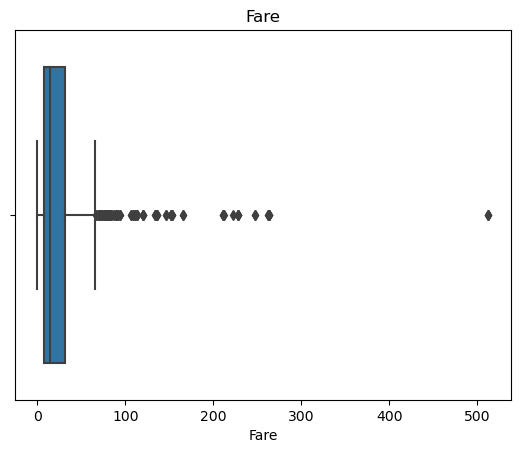

In [112]:
#Check fare for outliers
import seaborn as sns
plot1=sns.boxplot(x=train['Fare'])
plot1.set_title('Fare')

In [113]:
#Despite the outlier I think its worth keeping in the data as it represents the ultra-wealthy passenger

In [114]:
#import and fit tree to training data
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
train_features = train[['Pclass','Sex_male','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
train_outcome= train[['Survived']]
tree.fit(train_features,train_outcome)



DecisionTreeClassifier(random_state=0)

In [115]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [116]:
#Make same changes to test data
test=test[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test['Age']=test['Age'].replace(np.NaN,test['Age'].mean())
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)
test = test[test['Fare'].notna()]

test.describe()
test_features = test[['Pclass','Sex_male','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
test_outcome= test[['Survived']]

In [117]:
#Accuracy and MSE of first classifier
from sklearn.metrics import accuracy_score, mean_squared_error
y_pred=tree.predict(test_features)
print(accuracy_score(test_outcome,y_pred))
print(mean_squared_error(test_outcome,y_pred))

0.7817745803357314
0.2182254196642686


In [118]:
#First classifier probability predictions 
tree.predict_proba(test_features)[:,1]

array([0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.66666667,
       0.        , 0.5       , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.1       , 1.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.     

<BarContainer object of 8 artists>

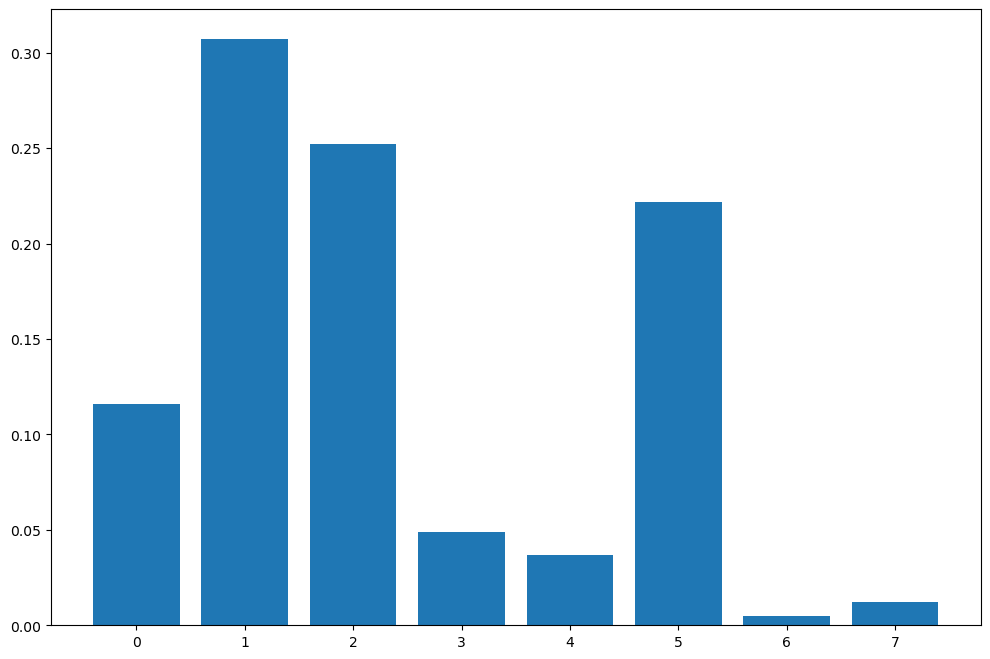

In [119]:
#check the importantce of each feature
plt.figure(figsize=(12, 8))
plt.bar(np.arange(train_features.shape[1]), np.squeeze(np.abs(tree.feature_importances_)))

In [120]:
#Make new classifier with only important features
train2_features = train[['Pclass','Sex_male','Age','Fare']]
train2_outcome= train[['Survived']]
tree.fit(train2_features,train2_outcome)

#change test features
test2_features = test_features[['Pclass','Sex_male','Age','Fare']]

#Second classifier scores
y_pred2=tree.predict(test2_features)
print(accuracy_score(test_outcome,y_pred2))
print(mean_squared_error(test_outcome,y_pred2))

0.7961630695443646
0.2038369304556355


In [121]:
#second classifier probability predictions
tree.predict_proba(test2_features)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

In [122]:
import statsmodels.api as smf
probit_model=smf.Probit(train_outcome,train_features)
result=probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.497474
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                         Probit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Mar 2023   Pseudo R-squ.:                  0.2522
Time:                        11:29:21   Log-Likelihood:                -442.25
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.389e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0271      0.049      0.548      0.584      -0.070       0.124
Sex_male      -1.3463      0.

In [123]:
p_pred=pd.DataFrame(result.predict(test_features))
print(p_pred)

            0
0    0.169175
1    0.599843
2    0.185573
3    0.167421
4    0.574007
..        ...
413  0.167962
414  0.894104
415  0.171256
416  0.167962
417  0.119739

[417 rows x 1 columns]


In [124]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_outcome, p_pred)
auc_score2 = roc_auc_score(test_outcome, y_pred2)

print(auc_score1, auc_score2)

0.9769364448857994 0.7765019860973188
